In [96]:
#OBJECTIVE NO.1 : I want the years of 2019 to 2021 and 5 borough and check for 
# the number of delays  

import pandas as pd
import matplotlib.pyplot as plt


bus_delay = pd.read_csv("Bus_Delays.csv")

bus_delay.head(5)

c:\Users\Visoroy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Year
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/5/2015 8:10,11/5/2015 8:12,New Jersey,...,11,Yes,No,Yes,11/5/2015 8:12,NaN,11/5/2015 8:12,Running Late,School-Age,2015
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,6716,11/5/2015 8:10,11/5/2015 8:12,Manhattan,...,2,Yes,Yes,No,11/5/2015 8:12,NaN,11/5/2015 8:13,Running Late,School-Age,2015
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/5/2015 8:09,11/5/2015 8:13,Bronx,...,8,Yes,Yes,Yes,11/5/2015 8:13,NaN,11/5/2015 8:13,Running Late,Pre-K,2015
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,2699,11/5/2015 8:12,11/5/2015 8:14,Manhattan,...,6,No,No,No,11/5/2015 8:14,NaN,11/5/2015 8:14,Running Late,School-Age,2015
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,2116,11/5/2015 8:13,11/5/2015 8:14,Manhattan,...,6,No,No,No,11/5/2015 8:14,NaN,11/5/2015 8:14,Running Late,School-Age,2015


In [18]:
#First I wanna get rid of any missing data

bus_delay = bus_delay.dropna().reset_index(drop=True)
bus_delay.isna().sum()

#After looking at this I dropped incidents number but this can skewed my information to
#keep the ones with incident numbers. It would be wiser to not do this


School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Incident_Number                    0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
Year                               0
dtype: int64

In [19]:
#Next I wanna get rid of the columns I won't be needing because this is a lot
#Last_Updated_on, Has_Contractor_Notified Parent/School, informed _on aren't necessary atm

bus_delay = bus_delay.drop(["Has_Contractor_Notified_Schools","Has_Contractor_Notified_Parents", "Have_You_Alerted_OPT","Informed_On"], axis = "columns")
bus_delay.head(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Year
0,2015-2016,1228925,Special Ed AM Run,31324,X400,Accident,10444,11/12/2015 7:20,11/12/2015 7:41,Bronx,"BORO TRANSIT, INC.",45-50 MIN,3,2787061,11/12/2015 7:41,Running Late,School-Age,2015
1,2015-2016,1229092,General Ed PM Run,21792,M9084,Accident,2751,11/12/2015 14:20,11/12/2015 14:27,Manhattan,SNT BUS INC,1 HOUR,0,2787899,11/12/2015 14:33,Running Late,School-Age,2015
2,2017-2018,1424117,Special Ed AM Run,44127,W828,Heavy Traffic,75944,3/26/2018 7:12,3/26/2018 7:13,Westchester,"MONTAUK STUDENT TRANS, INC. (B2321)",16-30 Min,0,90547608,3/26/2018 8:58,Running Late,School-Age,2018
3,2017-2018,1401862,Special Ed AM Run,VN0234,W940,Heavy Traffic,75816,1/10/2018 6:39,1/10/2018 7:06,Westchester,VAN TRANS LLC (B2192),46-60 Min,0,X,1/1/1900 0:00,Running Late,School-Age,2018
4,2015-2016,1230544,General Ed PM Run,2590,X9005,Other,10118,11/18/2015 13:30,11/18/2015 13:48,Bronx,BOBBY`S BUS CO. INC.,2hr,0,2792058,11/18/2015 14:41,Running Late,School-Age,2015


In [30]:
#I want the year of 2018 and forward because it's a lot to graph between 2015 to 2022

delay_18 = bus_delay.loc[bus_delay.loc[:, "Year"] >= 2018]
delay_18.head(5)



,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Year
2,2017-2018,1424117,Special Ed AM Run,44127,W828,Heavy Traffic,75944,3/26/2018 7:12,3/26/2018 7:13,Westchester,"MONTAUK STUDENT TRANS, INC. (B2321)",16-30 Min,0,90547608,3/26/2018 8:58,Running Late,School-Age,2018
3,2017-2018,1401862,Special Ed AM Run,VN0234,W940,Heavy Traffic,75816,1/10/2018 6:39,1/10/2018 7:06,Westchester,VAN TRANS LLC (B2192),46-60 Min,0,X,1/1/1900 0:00,Running Late,School-Age,2018
9,2017-2018,1424679,Special Ed AM Run,24621,X082,Heavy Traffic,"8,138,083,760,841,300,000",3/27/2018 7:51,3/27/2018 7:53,Bronx,VAN TRANS LLC (B2192),0-15 Min,19,90548865,3/27/2018 8:55,Running Late,School-Age,2018
10,2017-2018,1424715,Special Ed AM Run,GC0098,Y875,Heavy Traffic,"1,208,412,450",3/27/2018 8:09,3/27/2018 8:15,Bronx,G.V.C. LTD. (B2192),0-15 Min,3,90548834,3/27/2018 8:36,Running Late,School-Age,2018
12,2017-2018,1424964,Special Ed AM Run,74645,X312,Heavy Traffic,"841,008,447",3/28/2018 6:47,3/28/2018 6:50,Bronx,VAN TRANS LLC (B2192),0-15 Min,5,90549844,3/28/2018 8:36,Running Late,School-Age,2018


In [41]:
#Next I wanna just narrow down to which boroughs I want
#I want Bronx,Manhattan,Queens,Brooklyn, and Staten Island

#NYC_delay = (delay_18["Boro"] == "Bronx") & (delay_18["Boro"] == "Manhattan") & (delay_18["Boro"] == "Brooklyn") & (delay_18["Boro"] == "Queens") & (delay_18["Boro"] == "Staten Island")
#delay_18[NYC_delay].head()

#NYC_delay = delay_18["Boro"] == "Bronx" 
#delay_18[NYC_delay]

#nyc_delay = delay_18.loc[(delay_18['Boro'] == "Bronx") & (delay_18["Boro"] == "Manhattan") & (delay_18["Boro"] == "Brooklyn") & (delay_18["Boro"] == "Queens") & (delay_18["Boro"] == "Staten Island")]

#Yoooooooo!!!! I'm amazing, first try too >_>
nyc_delay = delay_18.loc[delay_18["Boro"].isin(["Bronx", "Manhattan","Brooklyn","Queens","Staten Island"])]
#nyc_delay.head(15)
nyc_delay.count()

School_Year                      2892
Busbreakdown_ID                  2892
Run_Type                         2892
Bus_No                           2892
Route_Number                     2892
Reason                           2892
Schools_Serviced                 2892
Occurred_On                      2892
Created_On                       2892
Boro                             2892
Bus_Company_Name                 2892
How_Long_Delayed                 2892
Number_Of_Students_On_The_Bus    2892
Incident_Number                  2892
Last_Updated_On                  2892
Breakdown_or_Running_Late        2892
School_Age_or_PreK               2892
Year                             2892
dtype: int64

In [47]:
#tried to export as a csv but got a file type to fix add a .csv to the file and it'll work again
#I won't be needing this anymore but just to keep as future refernce 

#nyc_delay.to_csv('nyc_delays_2018_to_2021', index=False)

In [48]:
#load in the new and improved csv
new_delay = pd.read_csv("nyc_delays_2018_to_2022.csv")
new_delay.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK,Year,Month
0,2017-2018,1424679,Special Ed AM Run,24621,X082,Heavy Traffic,"8,138,083,760,841,300,000",3/27/2018 7:51,3/27/2018 7:53,Bronx,VAN TRANS LLC (B2192),0-15 Min,19,90548865,3/27/2018 8:55,Running Late,School-Age,2018,3
1,2017-2018,1424715,Special Ed AM Run,GC0098,Y875,Heavy Traffic,"1,208,412,450",3/27/2018 8:09,3/27/2018 8:15,Bronx,G.V.C. LTD. (B2192),0-15 Min,3,90548834,3/27/2018 8:36,Running Late,School-Age,2018,3
2,2017-2018,1424964,Special Ed AM Run,74645,X312,Heavy Traffic,"841,008,447",3/28/2018 6:47,3/28/2018 6:50,Bronx,VAN TRANS LLC (B2192),0-15 Min,5,90549844,3/28/2018 8:36,Running Late,School-Age,2018,3
3,2017-2018,1424977,Special Ed AM Run,24661,X308,Heavy Traffic,11068,3/28/2018 6:52,3/28/2018 6:53,Bronx,VAN TRANS LLC (B2192),16-30 Min,0,90549846,3/28/2018 8:37,Running Late,School-Age,2018,3
4,2017-2018,1425098,Special Ed AM Run,24621,X082,Heavy Traffic,"8,138,083,760,841,300,000",3/28/2018 7:56,3/28/2018 7:57,Bronx,VAN TRANS LLC (B2192),0-15 Min,19,90549866,3/28/2018 8:42,Running Late,School-Age,2018,3


In [51]:
#just notice that the last updated on is there and Ion like it. BEGONE.
new_delay = new_delay.drop(["Last_Updated_On"], axis = "columns")
new_delay.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Incident_Number,Breakdown_or_Running_Late,School_Age_or_PreK,Year,Month
0,2017-2018,1424679,Special Ed AM Run,24621,X082,Heavy Traffic,"8,138,083,760,841,300,000",3/27/2018 7:51,3/27/2018 7:53,Bronx,VAN TRANS LLC (B2192),0-15 Min,19,90548865,Running Late,School-Age,2018,3
1,2017-2018,1424715,Special Ed AM Run,GC0098,Y875,Heavy Traffic,"1,208,412,450",3/27/2018 8:09,3/27/2018 8:15,Bronx,G.V.C. LTD. (B2192),0-15 Min,3,90548834,Running Late,School-Age,2018,3
2,2017-2018,1424964,Special Ed AM Run,74645,X312,Heavy Traffic,"841,008,447",3/28/2018 6:47,3/28/2018 6:50,Bronx,VAN TRANS LLC (B2192),0-15 Min,5,90549844,Running Late,School-Age,2018,3
3,2017-2018,1424977,Special Ed AM Run,24661,X308,Heavy Traffic,11068,3/28/2018 6:52,3/28/2018 6:53,Bronx,VAN TRANS LLC (B2192),16-30 Min,0,90549846,Running Late,School-Age,2018,3
4,2017-2018,1425098,Special Ed AM Run,24621,X082,Heavy Traffic,"8,138,083,760,841,300,000",3/28/2018 7:56,3/28/2018 7:57,Bronx,VAN TRANS LLC (B2192),0-15 Min,19,90549866,Running Late,School-Age,2018,3


In [73]:
#to narrow it down I'll use the school year to get 2018 to 2019 because I am getting 2017-2018
#I hate this lmaoooo

#nyc_delay.info()
nyc_delay_18_22 = new_delay.loc[new_delay.loc[:,"School_Year"] != "2017-2018", :]

In [74]:
nyc_delay_18_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 253 to 2891
Data columns (total 18 columns):
School_Year                      1122 non-null object
Busbreakdown_ID                  1122 non-null int64
Run_Type                         1122 non-null object
Bus_No                           1122 non-null object
Route_Number                     1122 non-null object
Reason                           1122 non-null object
Schools_Serviced                 1122 non-null object
Occurred_On                      1122 non-null object
Created_On                       1122 non-null object
Boro                             1122 non-null object
Bus_Company_Name                 1122 non-null object
How_Long_Delayed                 1122 non-null object
Number_Of_Students_On_The_Bus    1122 non-null int64
Incident_Number                  1122 non-null object
Breakdown_or_Running_Late        1122 non-null object
School_Age_or_PreK               1122 non-null object
Year                         

Text(0.5, 0, 'Borough')

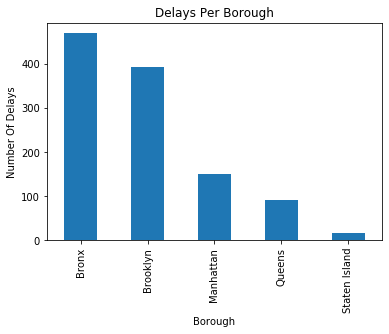

In [97]:
nyc_delay_18_22["Boro"].value_counts().plot.bar()
plt.title("Delays Per Borough")
plt.ylabel("Number Of Delays")
plt.xlabel("Borough") 

Text(0.5, 0, 'Reasons')

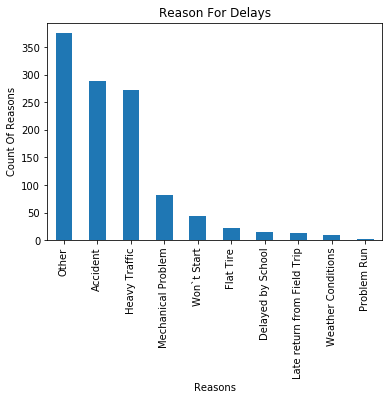

In [98]:
nyc_delay_18_22["Reason"].value_counts().plot.bar()
plt.title("Reason For Delays")
plt.ylabel("Count Of Reasons")
plt.xlabel("Reasons")

Text(0.5, 0, 'Length of Delay')

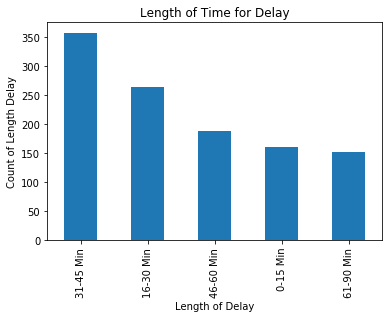

In [99]:
nyc_delay_18_22["How_Long_Delayed"].value_counts().plot.bar()
plt.title("Length of Time for Delay")
plt.ylabel("Count of Length Delay")
plt.xlabel("Length of Delay")

Text(0.5, 0, 'School Year')

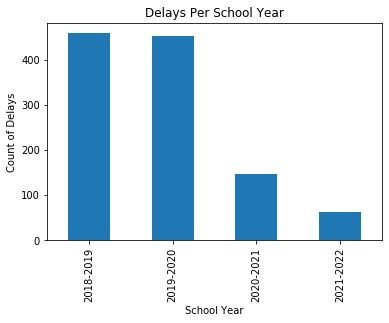

In [101]:
nyc_delay_18_22["School_Year"].value_counts().plot.bar()
plt.title("Delays Per School Year")
plt.ylabel("Count of Delays")
plt.xlabel("School Year")

In [90]:
nyc_delay_18_22.to_csv("nyc_bus_delay")

In [95]:
plt.pie(nyc_delay_18_22["Reason"].value_counts(), label = nyc_delay_18_22["Reason"].value_counts().keys().to_list(), autopct= '%0.1f%%')

plt.show()

AttributeError: module 'matplotlib' has no attribute 'pie'